<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Родион! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from matplotlib import pyplot as plt

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    

- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html) 


In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
display(df.head())
display(df.info())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.

 

<div class="alert alert-warning">



Совет: 

Можно еще отдельно проверить датасет на сбалансированность классов в таргете. Это важная информация при моделировании и помогло бы решить бонусное задание сразу.  Тут можно [почитать](https://dyakonov.org/2021/05/27/imbalance/) дополнительно зачем мы обращаем внимание на это





</div>


In [3]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

В генеральной выборке классы не сбалансированны - пользователей тарифа "Смарт" более чем в два раза больше, чем пользователей тарифа "Ультра".

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    
Посмотрел количество пользователей по тарифам - действительно, в исходных данных количество пользователей с тарифом "Смарт" превышает количество пользователей с тарифом "Ультра" более чем в два раза.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех :

👍
</div>


## Разбейте данные на выборки

In [4]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [5]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features,
                                                                                        target,
                                                                                        test_size=0.4,
                                                                                        random_state=12345,
                                                                                        stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, 
                                                                            target_valid_test,
                                                                            test_size=0.5,
                                                                            random_state=12345,
                                                                            stratify=target_valid_test)
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

(1928, 4)

(1928,)

(643, 4)

(643,)

(643, 4)

(643,)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все правильно!

Здорово что проконтролировал разбиение с помощью .shape

<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым




</div>





In [6]:
display(target_train.value_counts())
display(target_valid.value_counts())
display(target_test.value_counts())

0    1337
1     591
Name: is_ultra, dtype: int64

0    446
1    197
Name: is_ultra, dtype: int64

0    446
1    197
Name: is_ultra, dtype: int64

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    
Добавил параметр stratify с сохранением соотношения из генеральной выборки и проверил распределение таргетов в выборках.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех 👍:

Принято
</div>


## Исследуйте модели

### Решающее дерево

In [7]:
best_tree_model = None
best_tree_result = 0
best_tree_depth = 0
tree_valid_results = []
tree_train_results = []
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    tree_valid_results.append(result)
    result_train = model.score(features_train, target_train)
    tree_train_results.append(result_train)
    if result > best_tree_result:
        best_tree_model = model
        best_tree_result = result
        best_tree_depth = depth
        
print(f'Лучший показатель accuracy для модели решающего дерева: {best_tree_result} \
при максимальной глубине равной {best_tree_depth}')

Лучший показатель accuracy для модели решающего дерева: 0.7853810264385692 при максимальной глубине равной 5


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле




<div class="alert alert-warning">


Совет: 




- Можно добавить график, хорошо оформленный график украсит проект. Тут на графике можно посмотреть как при изменении гиперпараметров меняется точность на train и validation датасете (для этого собираем наши метрики на валидации и train в списки, а затем по ним обычный plt.plot()) Такой способ используют чтобы лучше отследить переобучение



- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 

</div>



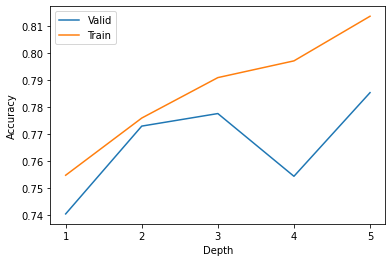

In [8]:
plt.plot(range(1, 6), tree_valid_results, label='Valid')
plt.plot(range(1, 6), tree_train_results, label='Train')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.xticks(range(1, 6))
plt.legend();

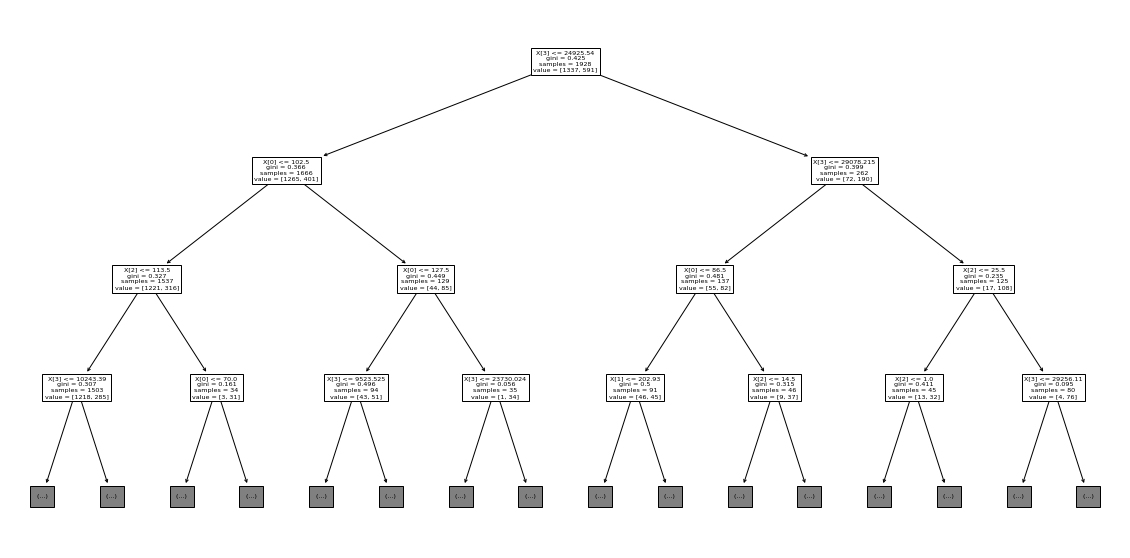

In [9]:
plt.figure(figsize=(20,10))
plot_tree(best_tree_model, max_depth=3);


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍


<div class="alert alert-warning">

Совет:

    
    
    
    
1. tree_plot
    

Так красивей (схема)
    
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(35,20))
    _ = tree.plot_tree(your_model, 
                   feature_names=features.columns.values, 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15)
    
    
2. График метрики  
    
    
Здорово!   
    
Но нам же график не только для красоты, но и для анализа, с последующими действиями. Что мы видим тут? Как метрика на валидации еще не стала однозначна падать, это значит можно попробовать взять глубину побольше.  Вот когда на графике мы увидим как метрика достигнув пика начинает однозначно падать, вот тут мы и сможем сделать вывод что модель переобучается после такого то значения max_dep


</div>



  

### Случайный лес

In [10]:
best_forest_model = None
best_forest_result = 0
best_forest_est = 0
best_forest_depth = 0
forest_valid_results = []
forest_train_results = []
for est in range(1, 16):
    for depth in range(1, 6):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        result_train = model.score(features_train, target_train)
        forest_valid_results.append(result)
        forest_train_results.append(result_train)
        if result > best_forest_result:
            best_forest_model = model
            best_forest_result = result
            best_forest_est = est
            best_forest_depth = depth

print(f'Лучший показатель accuracy для модели случайного леса: {best_forest_result} \
при количестве оценщиков равным {best_forest_est} и максимальной глубине {best_forest_depth}')

Лучший показатель accuracy для модели случайного леса: 0.7978227060653188 при количестве оценщиков равным 14 и максимальной глубине 5


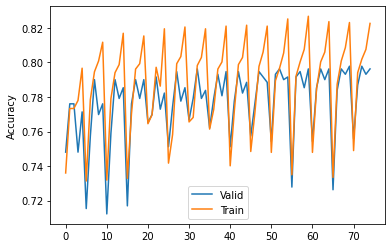

In [11]:
plt.plot(forest_valid_results, label='Valid')
plt.plot(forest_train_results, label='Train')
plt.ylabel('Accuracy')
plt.legend();

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет 🤔:


Тут бы подошел трехмерный график или heatmap
</div>



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Верно. 

<div class="alert alert-warning">

Совет:


- Можно было сделать похитрее - добавить перебор 2 гиперпараметров в двойном цикле, в результата метрика качества вырастет. 
    
 

- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить ))  А еще есть tqdm, показывает на каком этапе у нас работа в цикле происходит
    
   
- А еще можно вместо цикла использовать sklearn-ий встроенный функционал GridSearchCV. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_.  Это тема будущих теоретических занятий, но если есть время можешь сразу попробовать.



</div>


### Логистическая регрессия

In [12]:
best_regression_model = None
best_regression_result = 0
best_regression_iter = 0
for itr in range(100, 1501, 100):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=itr)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_regression_result:
        best_regression_model = model
        best_regression_result = result
        best_regression_iter = itr

print(f'Лучший показатель accuracy для модели логистической регрессии: {best_regression_result} \
при количестве итераций равным {best_regression_iter}')

Лучший показатель accuracy для модели логистической регрессии: 0.7387247278382582 при количестве итераций равным 100


### Общий вывод по моделям

Наименьшую точность по валидационной выборке показала модель логистической регрессии - 0.7387247278382582.\
Модель с таким значением точности нельзя рекомендовать к дальнейшему использованию.

Модели случайного леса и решающего дерева показали схожие показатели точности - 0.7978227060653188 и 0.7853810264385692 соответственно.

Для дальнейшей проверки выбираем модель случайного леса.



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему RF обычно показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    
1) Чем больше глубина решающего дерева, тем больше вероятность переобучения, когда модель просто запомнит тренировочные данные - тогда точность на валидационной выборке начнём падать. При этом точность на тренировочной выборке также должна падать.
    
2) Насколько я понимаю, RF совмещает в себе несколько деревьев (количество которых мы задавали гиперпараметром n_estimators), при этом эти деревья обладают меньшей вариативностью (большая вариативность или гибкость ведут к переобучению) относительного общего набора данных так как "учатся" на ограниченных наборах данных из общего. А потом в узлах мы получаем усреднёный вариант.
    
3) Логистическая регрессия на основе входных данных предсказывает произойдёт некоторое событие или нет в бинарном формате (0 или 1) - так что вполне подходит для задачи классификации с двумя исходами.
    
4) Мне кажется, маловато признаков для логистической регрессии.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Верно, переобучение. На train точность растет вплоть до 100%. 
    
    
2. Да, в RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. 


</div>

## Проверьте модель на тестовой выборке

In [13]:
result_tree_test = best_tree_model.score(features_test, target_test)
print(f'Показатель accuracy лучшей модели решающего дерева на тестовой выборке: {result_tree_test}')

Показатель accuracy лучшей модели решающего дерева на тестовой выборке: 0.8118195956454122


In [14]:
result_forest_test = best_forest_model.score(features_test, target_test)
print(f'Показатель accuracy лучшей модели случайного леса на тестовой выборке: {result_forest_test}')

Показатель accuracy лучшей модели случайного леса на тестовой выборке: 0.8087091757387247


In [15]:
result_regression_test = best_regression_model.score(features_test, target_test)
print(f'Показатель accuracy лучшей модели логистической регрессии на тестовой выборке: {result_regression_test}')

Показатель accuracy лучшей модели логистической регрессии на тестовой выборке: 0.7465007776049767



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

К данному этапу мы должны подойти с одной выбранной моделью. Родион, о логике использования датасетов:
    
1. На train мы обучаем
2. По валидации смотрим на результаты обучения (следим чтобы не было переобучения и/или делаем подбор гиперпараметров).  И выбираем лучшую модель. 
3. Тестовая (out-of_sample) у нас для финальной проверки, когда определена модель с конкретными гиперпараметрами. Использование тестовой выборки, чтобы еще раз посмотреть на модели - это нарушение логической цепочки моделирования. 

А как сделано тобой, может сложиться впечатление что мы на тестовой по прежнему что то выбираем, но выбор сделан, и если лучшая на валидации покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала.
    
 [Вот](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0   ) тут можно дополнительно почитать.

<div class="alert alert-warning">
   
Совет: 

- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.
</div>




Лучший показатель accuracy был получен для модели случайного леса при количестве оценщиков равным 14 и максимальной глубине 5.

Найдем accuracy данной модели на тренировочной выборке:

In [16]:
result_forest_test = best_forest_model.score(features_test, target_test)
print(f'Показатель accuracy лучшей модели случайного леса на тестовой выборке: {result_forest_test}')

Показатель accuracy лучшей модели случайного леса на тестовой выборке: 0.8087091757387247


Также попробуем переобучить модель случайного леса с подобранными гиперпараметрами на объеденённой выборке из обучающей и валидационной выборке:

In [17]:
features_train_valid = pd.concat([features_train, features_valid])
target_train_valid = pd.concat([target_train, target_valid])
model = RandomForestClassifier(random_state=12345, n_estimators=14, max_depth=5)
model.fit(features_train_valid, target_train_valid)
result_forest_combine = model.score(features_test, target_test)
print(f'Показатель accuracy переобученной модели случайного леса на тестовой выборке: {result_forest_combine}')

Показатель accuracy переобученной модели случайного леса на тестовой выборке: 0.8273716951788491


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    
Действительно, на совмещённой выборке - тренировочной и валидационной - получилось лучше.
</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом. Тобой подбиралась лучшая комбинация не по одному гиперпараметру, попробовал дообучение и вот он результат!




</div>

### Вывод по проверке моделей на тестовой выборке

На этапе исследования в качестве наиболее точной была выбрана модель случайного леса со следующими гиперпараметрами - максимальная глубина каждого дерева 5, количество оценщиков 14.\
На тестовой выборке полученная ранее модель показала точность 0.8087091757387247.\
Также была проверена и обучена модель случайного леса с установленными выше гиперпараметрами, но на большей тренировочной выборке, что дало более высокий показатель точности на тестовой выборке - 0.8273716951788491.

## (бонус) Проверьте модели на адекватность

In [18]:
dummy = DummyClassifier(strategy="stratified")
dummy.fit(features, target)
dummy_result = dummy.score(features, target)
if result_forest_combine > dummy_result:
    print('Модель случайного леса, обученная на объеденённой выборке, адекватна')
else:
    print('Модель случайного леса, обученная на объеденённой выборке, не адекватна')

Модель случайного леса, обученная на объеденённой выборке, адекватна


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет 🤔:

В случаи дисбаланса максимальная метрика у константной модели достигается при стратегии most_frequent

</div>



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Не учтен один момент - в целевом признаке у нас дисбаланс, нули встречаются гораздо чаще единичек!  Какая будет accuracy у наивной модели которая предсказывает постоянно нули?


<div class="alert alert-warning">


Совет: 

При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей

</div>





<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Родион, ты старательно выполнил работу, все четко, осмысленно. Выводы присутствуют. Вижу у тебя получается в ML,  дальше будет интересней )  


Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 

- обрати внимание на проверку сбалансированность классов в таргете в разделе EDA
- использовать stratify
- добавить график метрики    
- посоветовал посмотреть в сторону GridSearchCV
- как можно улучшить результаты 

Замечания на будущее:
    
- Комментарии к коду отсутствуют - коллеги могут не понять хода твоих мыслей, пока вроде код простой, но стоит держать в голове что дальше код усложнится.  
- Было бы замечательно, в выводе немножко о данных, работе с ними (пусть даже никакой работы и не было), моделировании и полученных результатах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.

 
    
Обязательное к исправлению:


- к моменту проверки качества прогноза на тесте, приходим с уже одной выбранной моделью с лучшими гиперпараметрами выбранными на валидации

- стоит переделать бонусное задание с учётом моего комментария

 
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай )     

</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    
По вопросам - хочется узнать ответы на вопросы дополнительные, а также, если не сложно - чуть чуть объяснить про GridSearchCV - я попытался сам разобраться, но пока не очень получилось, а времени дальше затягивать сдачу не было.
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:

    
Как быстро воспользоваться GS:    
    
1.  заходишь в туториал копируешь пример:
    
    
    from sklearn import svm, datasets
    from sklearn.model_selection import GridSearchCV
    iris = datasets.load_iris()
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters)
    clf.fit(iris.data, iris.target)


    sorted(clf.cv_results_.keys())
    
    
2. Меняешь    
    
    
    
    iris.data  ------ > на свои фичи  (обьеденив через pd.concat свой train и validation, ведь валидационный датасет GS делает сам)  
    iris.target -------> на своий таргет
    
    меняешь модель если хочешь не SVM        
    
    меняешь {'kernel':('linear', 'rbf'), 'C':[1, 10]} на свой набор перебираемых параметров
    
    
        
3. После обучения смотришь    clf.best_score_ - это оценка на валидации лучшей модели которую GS нашел в цикле внутри себя,  а чтобы использовать эту модель используешь clf.best_estimator_. Если из любопытства хочешь узнать какие лучшие гиперпараметры нашел GS смотришь clf.best_params_. 
    
    
    
    
GS сделает то же самое что ты делал в этом проекте, только он сам создаст валидационный датасет, сам построит циклы, сам соберет метрики (поэтому точно также можно будет строить графики метрик), сам найдет лучшие гиперпараметры и сам обучит модель на них. Причем он будет подбирать лушие гиперпараметры на некольих датасетах, борясь с рандомом - это называется кроссвалидация.   
    
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>



    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и ты узналА что то новое, а проект стал лучше, и симпатичней.


  
Отличная работа Родион. Желаю успехов в дальнейшей учебе!





</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
